In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles

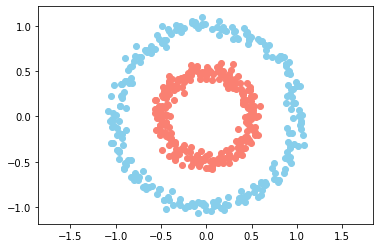

In [5]:
# CREAR EL DATASET

n = 500
p = 2

# X son los datos bidimensionales, Y son las etiquetas
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y.reshape(Y.shape[0],1)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [10]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur)      * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1

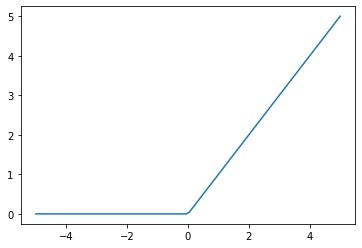

In [6]:
# FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))
#plt.plot(_x, sigm[0](_x))

In [14]:
# CREAMOS LA RED NEURONAL

l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f):
    nn = []
  
    for l, layer in enumerate(topology[:-1]):
    
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    return nn

In [8]:
# FUNCION DE ENTRENAMIENTO

topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)  

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))



def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
  out = [(None, X)]
  
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z, a))
    
  
  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      #z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
       
      _W = neural_net[l].W
 
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
  return out[-1][1]
  
  
train(neural_net, X, Y, l2_cost, 0.5)

array([[0.46061896],
       [0.45250488],
       [0.45498516],
       [0.45464436],
       [0.45081291],
       [0.4459735 ],
       [0.45699801],
       [0.44507557],
       [0.45403613],
       [0.46164392],
       [0.45726189],
       [0.44895629],
       [0.4623073 ],
       [0.4584567 ],
       [0.44949438],
       [0.45614897],
       [0.46109936],
       [0.44002063],
       [0.44348936],
       [0.44196953],
       [0.45202117],
       [0.44483153],
       [0.46203459],
       [0.460986  ],
       [0.46092461],
       [0.43929842],
       [0.46173039],
       [0.45184694],
       [0.44678136],
       [0.44378069],
       [0.44327496],
       [0.44800297],
       [0.4434122 ],
       [0.44540303],
       [0.45280995],
       [0.44207409],
       [0.44380258],
       [0.45349115],
       [0.45489218],
       [0.45585127],
       [0.45221316],
       [0.45506679],
       [0.44766186],
       [0.44567053],
       [0.44372708],
       [0.44739542],
       [0.44523943],
       [0.453

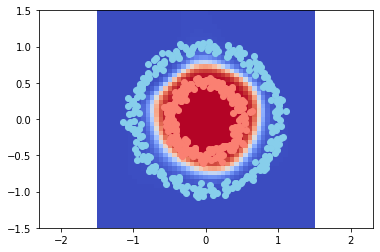

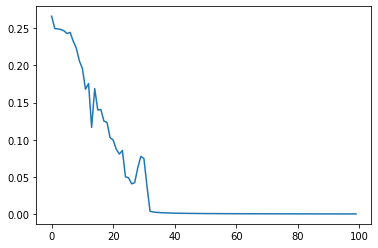

In [10]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    #time.sleep(0.5)  